In [547]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#configuracao gáficos
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 8)
%matplotlib inline

#inicializra plotly no nootebook 
py.init_notebook_mode(connected = True)

In [548]:
df_spend_train = pd.read_csv("data/spend_train.csv")

## Análise da dispersão dos dados 

In [549]:
df_spend_train.head()

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs
0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,0,6305.06,35.56,1,0.00
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00
2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,2,7167.94,0.00,0,0.00
3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,3,16631.05,0.00,1,5.55
4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,4,115.29,0.00,0,6.89


In [550]:
df_spend_train.describe()

,credit_line,month,spends,revolving_balance,card_request,minutes_cs
count,980818.000000,980818.000000,980818.000000,980818.000000,980818.000000,980818.000000
mean,6450.701643,12.103346,2878.074202,481.071351,0.092795,2.791051
std,4564.596250,8.515882,3529.032134,1431.827450,0.290145,6.644611
min,506.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2948.000000,5.000000,334.760000,0.000000,0.000000,0.000000
50%,5314.000000,11.000000,1568.165000,1.530000,0.000000,0.000000
75%,8763.000000,18.000000,4129.000000,141.660000,0.000000,1.720000
max,20484.000000,35.000000,20462.230000,20369.440000,1.000000,75.580000


Grafico da ditribuiçao do limite de credito concedido a cada 100 reais 

f = df.groupby('source') \
       .agg({'text':'size', 'sent':'mean'}) \
       .rename(columns={'text':'count','sent':'mean_sent'}) \
       .reset_index()

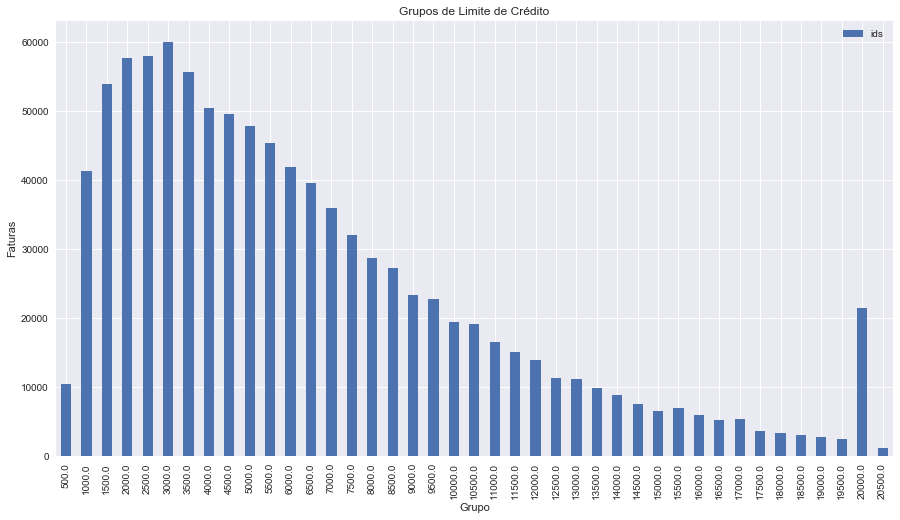

In [551]:
df_disp = df_spend_train
df_disp['cat_credit'] = round(df_disp['credit_line']/500)*500

gp_id_creLine = df_disp[['ids','cat_credit']].groupby('cat_credit').count()
gp_id_creLine.plot( kind='bar' , figsize = [15,8])
plt.title('Grupos de Limite de Crédito')
plt.xlabel('Grupo')
plt.ylabel('Faturas')
plt.show()

O grafico acima conta quantos registros estão no intervalo e não quantos clientes como queriamos 

## Análise por Cliente

In [552]:
#agrupamos os registro por cliente 
group_media = df_disp.groupby('ids') \
                    .agg({'credit_line':'mean', 'spends':'mean', 'revolving_balance': 'mean'})  \
                    .reset_index()

In [553]:
#quantidade de cliente 
group_media.describe()

,credit_line,spends,revolving_balance
count,45000.000000,45000.000000,45000.000000
mean,6441.681511,2871.454454,481.374504
std,4556.101062,2139.259699,465.824551
min,506.000000,12.296667,0.000000
25%,2949.000000,1225.933536,150.497159
50%,5302.000000,2300.543842,338.740417
75%,8737.000000,3953.112462,666.310946
max,20484.000000,15705.142000,8774.574000


# Total de Clientes: 45000

quantos desses clientes nunca atrasaram ?

In [554]:
df_adiplentes = df_spend_train
df_adiplentes = df_adiplentes[['revolving_balance', 'ids']].groupby('ids').sum()
df_adiplentes [df_adiplentes['revolving_balance'] == 0  ].count()

revolving_balance    25
dtype: int64

### Conclusão
Esse dataset paraticamente todos atrasaram alguma fatura o que nos leva a crer que __é a base de inadiplentes da carteira__ 

In [555]:
#criar grupo para os valores de média  
group_media['cat_credit'] = round(group_media['credit_line']/500)*500
group_media['cat_gastos'] = round(group_media['spends']/100)*100

[Text(0, 0.5, 'Qtde Clientes'), Text(0.5, 0, 'Limite R$')]

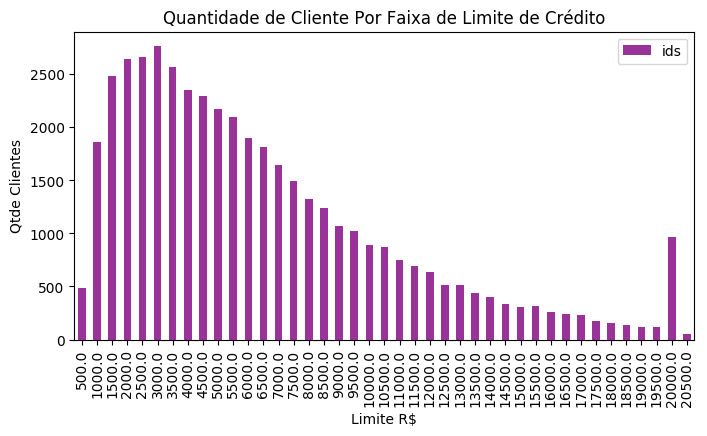

In [621]:
grafico = group_media[['ids','cat_credit']].groupby('cat_credit').count()\
    .plot(kind='bar', label=False, color='#993399', title ='Quantidade de Cliente Por Faixa de Limite de Crédito' , figsize = [8,4])

grafico.set(xlabel="Limite R$", ylabel="Qtde Clientes")

Sabemos que a quantidade de clientes devedores tem limites até \\$ 7500  
mas isso pode ser por que deve ter a maioria de clientes nesse intervalo e também percebemos um pico no grupo 
de \\$ 
20k

[Text(0, 0.5, 'Qtde Clientes'), Text(0.5, 0, 'Gasto médio R$')]

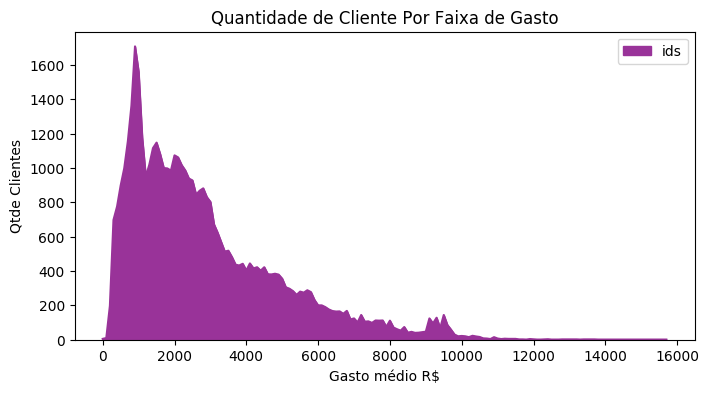

In [622]:
grf_gasto = group_media[['ids','cat_gastos']].groupby('cat_gastos').count()\
    .plot(kind='area' ,color='#993399', title ='Quantidade de Cliente Por Faixa de Gasto' , figsize = [8,4])
grf_gasto.set(xlabel="Gasto médio R$", ylabel="Qtde Clientes")


### Maioria dos clientes devedores gastam em média até \\$3mil por fatura

[Text(0, 0.5, 'Qtde Clientes'), Text(0.5, 0, 'Divida média R$')]

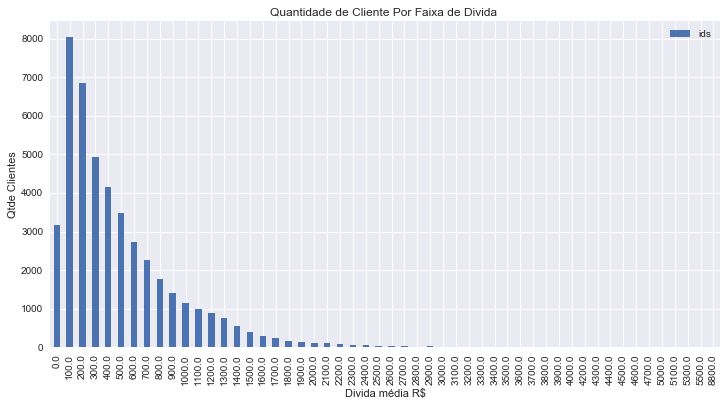

In [558]:
group_media['cat_divida'] = round(group_media['revolving_balance']/100)*100
grf_divida = group_media[['ids','cat_divida']].groupby('cat_divida').count()\
    .plot(kind='bar', title ='Quantidade de Cliente Por Faixa de Divida ',   figsize = [12,6])
grf_divida.set(xlabel="Divida média R$", ylabel="Qtde Clientes")

### Percebemos que a maioria dos  atrasos são em média valores __< $1000__

## Analise de dívida em relacao ao limite e ao gasto do mes 

In [559]:
df_divida = df_spend_train
df_divida['dif_divida_limite'] =  df_divida['revolving_balance'] / df_divida['credit_line'] 
df_divida['dif_divida_gasto'] = df_divida['revolving_balance'] / df_divida['spends'] 
df_divida.dif_divida_gasto.fillna(0, inplace=True)
df_divida[df_divida['dif_divida_gasto'] >.8]


,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,cat_credit,dif_divida_limite,dif_divida_gasto
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00,18000.0,0.189877,0.811095
30,a75638f1-4662-4f4f-044a-d649b676d85d,12717,10,7015.36,6836.73,0,17.22,12500.0,0.537606,0.974537
39,a75638f1-4662-4f4f-044a-d649b676d85d,12717,19,10.42,10.36,0,3.35,12500.0,0.000815,0.994242
44,e643bf65-9288-92f2-df13-eed631fe237c,4997,2,4371.41,4316.68,0,0.00,5000.0,0.863854,0.987480
45,e643bf65-9288-92f2-df13-eed631fe237c,4997,3,808.46,754.77,0,0.00,5000.0,0.151045,0.933590
58,e643bf65-9288-92f2-df13-eed631fe237c,4997,16,4931.72,4628.84,0,0.00,5000.0,0.926324,0.938585
71,b84024d8-a5ba-6c59-9133-1335c4a0a57d,5913,0,3425.53,3151.48,1,1.84,6000.0,0.532975,0.919998
73,b84024d8-a5ba-6c59-9133-1335c4a0a57d,5913,2,485.16,423.15,0,0.00,6000.0,0.071563,0.872186
74,b84024d8-a5ba-6c59-9133-1335c4a0a57d,5913,3,5645.41,5632.74,0,0.00,6000.0,0.952603,0.997756
79,b84024d8-a5ba-6c59-9133-1335c4a0a57d,5913,8,5848.97,5281.47,0,0.00,6000.0,0.893196,0.902974


### Não pagamento médio por mes 

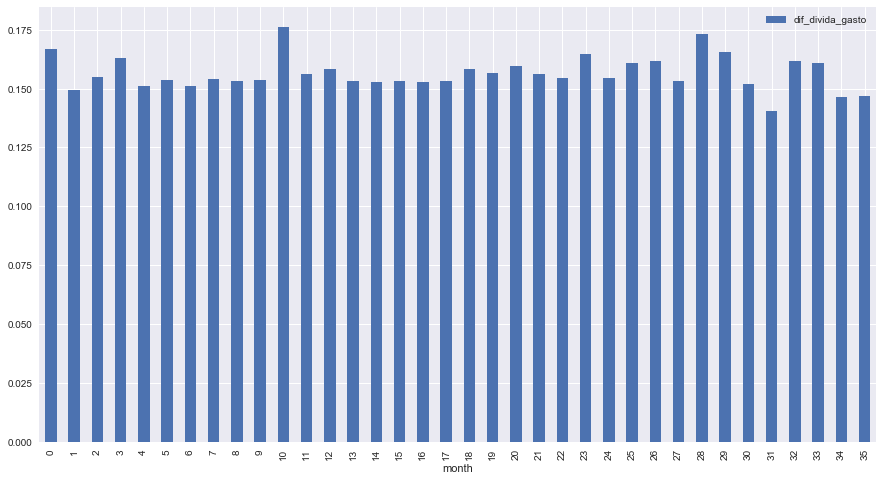

In [560]:
inad_med_mes =df_divida[['month','dif_divida_gasto']].groupby('month').mean()
inad_med_mes.plot(kind='bar' , figsize = [15,8])

## Conclusão 
- O tempo de antiguidade do cliente __não é um fator__ influente na inadiplência. 
- A média de inadiplencia é muito alta 15% para qualquer carteira de crédito o que nos desconfia que essa base tem apenas cliente que tiveram atraso


# Aonde concentra o maior capital devido ?

In [561]:
# O cliente pagou deve menos de 6% do gasto o que provavelmente deve ser fatura paga com atraso 
#faturas_atraso  = df_divida[['dif_divida_gasto']].query('dif_divida_gasto >= 0.17')

In [562]:
df_divida.describe()

,credit_line,month,spends,revolving_balance,card_request,minutes_cs,cat_credit,dif_divida_limite,dif_divida_gasto
count,980818.000000,980818.000000,980818.000000,980818.000000,980818.000000,980818.000000,980818.000000,980818.000000,980818.000000
mean,6450.701643,12.103346,2878.074202,481.071351,0.092795,2.791051,6451.613857,0.074523,0.156652
std,4564.596250,8.515882,3529.032134,1431.827450,0.290145,6.644611,4566.599247,0.181453,0.290980
min,506.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,0.000000,0.000000
25%,2948.000000,5.000000,334.760000,0.000000,0.000000,0.000000,3000.000000,0.000000,0.000000
50%,5314.000000,11.000000,1568.165000,1.530000,0.000000,0.000000,5500.000000,0.000302,0.001249
75%,8763.000000,18.000000,4129.000000,141.660000,0.000000,1.720000,9000.000000,0.029994,0.134578
max,20484.000000,35.000000,20462.230000,20369.440000,1.000000,75.580000,20500.000000,1.000000,1.000000


In [563]:
#df_divida.dif_divida_gasto

In [580]:
#Faturas que tiveram pagamento menor q o gasto 
grupos = df_divida.query('dif_divida_gasto >0')
#grupos = pd.cut(grupos.dif_divida_gasto, 10)
#nome dos labels 
grupos_percent = ['Até 10%','(10-20%]','(20-30%]','(30-40%]','(40-50%]','(50-60%]','(60-70%]','(70-80%]','(80-90%]','(90-100%]' ]
grupos = pd.cut(grupos.dif_divida_gasto, 10 \
                ,labels= grupos_percent)
#calcula o percentual de fatura
grupos_perc = grupos.value_counts(sort=False)
grupos_perc[:] = (grupos_perc / grupos_perc.sum()) * 100

[Text(0, 0.5, 'Faixa em % '), Text(0.5, 0, '% Faturas com saldo rotativo')]

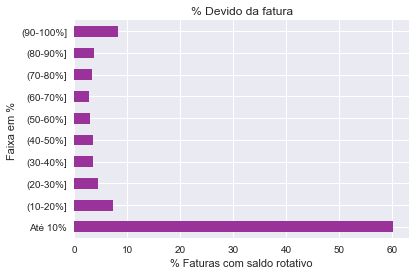

In [581]:
graficoPercDiv = grupos_perc
graficoPercDiv.plot.barh(color='#993399', figsize=(6,4) , title='% Devido da fatura',)\
                        .set(xlabel="% Faturas com saldo rotativo", ylabel="Faixa em % ")

In [582]:
grupos = df_divida.query('dif_divida_gasto >0')
grupos = pd.cut(grupos.dif_divida_gasto, 10\
                 ,labels=grupos_percent)
grupos.value_counts(sort=False)

Até 10%      406039
(10-20%]      49254
(20-30%]      29819
(30-40%]      24132
(40-50%]      24053
(50-60%]      20218
(60-70%]      18266
(70-80%]      22406
(80-90%]      24993
(90-100%]     55403
Name: dif_divida_gasto, dtype: int64

# Capital devido por faixa de percentual de atraso Quantidade de cliente 

## Selecionar as últimas faturas para ter uma estimativa da dívida

Como não temos indicação do pagamento do saldo rotativo então vamos estimar a inadiplência pelo saldo rotativo da últiam fatura do cliente 

In [567]:
#maior mes de cada cliente 
ultima_fatura_cliente = df_spend_train
ultima_fatura_cliente = ultima_fatura_cliente[['ids','month']].groupby('ids', as_index=False).agg({'month':'max'})

In [568]:
# recuperar as informações da ultima fatura de cada cliente 
ultima_fatura_cliente_merge = ultima_fatura_cliente.merge( df_spend_train ,on=['ids', 'month'], how='inner')
#ultima_fatura_cliente_merge

In [569]:
#faturas com saldo rotativo >0
ultima_fatura_cliente_merge = ultima_fatura_cliente_merge.query('revolving_balance >0 ')
#ultima_fatura_cliente_merge

### Agrupar as faturas pelo % do rotativo em relacao ao gasto 

In [709]:
#Dividir em 10 grupos a cada 10% 
bins = pd.cut(ultima_fatura_cliente_merge['dif_divida_gasto'], 10, labels=grupos_percent)
#bins.value_counts(sort=False)
ultima_fatura_cliente_merge_bins =ultima_fatura_cliente_merge.groupby(bins )\
    .agg({'revolving_balance':'sum', 'ids':'count'}) 
#renomear as colunas 
ultima_fatura_cliente_merge_bins = ultima_fatura_cliente_merge_bins\
                                    .rename(columns={'ids':'qtde', 'revolving_balance':'total_rotativo'})

#### Como não conseguimos calcular os valores absolutos vamos trabalhar as análises com proporções

In [710]:
#redefinar os indices do dataframe para poder construir graficos e tabelas 
divida_consolidada = ultima_fatura_cliente_merge_bins.reset_index()

#Calculo do percentual em relação aos totais 
divida_consolidada['total_perc'] = divida_consolidada['total_rotativo']/divida_consolidada['total_rotativo'].sum()*100
divida_consolidada['qtde_perc'] = divida_consolidada['qtde']/divida_consolidada['qtde'].sum()*100
divida_consolidada.sort_values(['total_perc', 'qtde_perc'], ascending=False )

,dif_divida_gasto,total_rotativo,qtde,total_perc,qtde_perc
9,(90-100%],7557010.72,2453,34.396409,7.948801
8,(80-90%],2827491.84,1244,12.869582,4.031108
7,(70-80%],2380599.37,1000,10.835511,3.240441
5,(50-60%],1882194.03,901,8.566974,2.919637
6,(60-70%],1700862.10,890,7.741626,2.883992
4,(40-50%],1413022.49,1028,6.431498,3.331173
3,(30-40%],1204197.79,1095,5.481014,3.548283
2,(20-30%],1102949.39,1414,5.020173,4.581983
1,(10-20%],1091352.95,2327,4.967390,7.540506
0,Até 10%,810667.06,18508,3.689824,59.974076


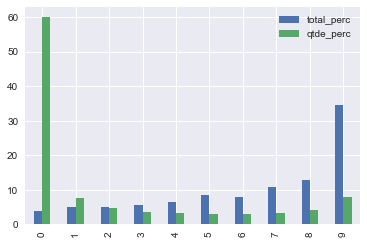

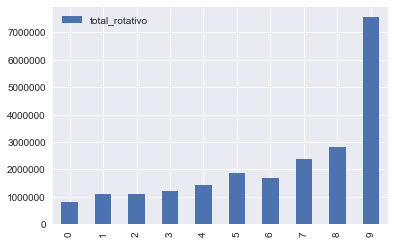

In [572]:
divida_consolidada[['dif_divida_gasto','total_perc','qtde_perc']].plot(kind='bar')
divida_consolidada[['dif_divida_gasto','total_rotativo']].plot(kind='bar')
plt.show()

In [585]:
# Criando um indicador de otimização qual grupo tem o maior dívida com menor quantidade de pessoas 
# Otimo = %TotalR$ / (1 - %Clientes)
divida_consolidada['otimo'] = (divida_consolidada['total_perc']/100)*(1-(divida_consolidada['qtde_perc']/100))
divida_consolidada.sort_values('otimo',  ascending=False)

,dif_divida_gasto,total_rotativo,qtde,total_perc,qtde_perc,otimo
9,(90-100%],7557010.72,2453,34.396409,7.948801,0.316623
8,(80-90%],2827491.84,1244,12.869582,4.031108,0.123508
7,(70-80%],2380599.37,1000,10.835511,3.240441,0.104844
5,(50-60%],1882194.03,901,8.566974,2.919637,0.083168
6,(60-70%],1700862.10,890,7.741626,2.883992,0.075184
4,(40-50%],1413022.49,1028,6.431498,3.331173,0.062173
3,(30-40%],1204197.79,1095,5.481014,3.548283,0.052865
2,(20-30%],1102949.39,1414,5.020173,4.581983,0.047901
1,(10-20%],1091352.95,2327,4.967390,7.540506,0.045928
0,Até 10%,810667.06,18508,3.689824,59.974076,0.014769


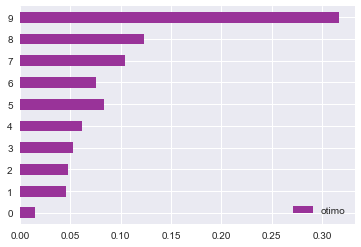

In [588]:
divida_consolidada[['dif_divida_gasto','otimo']].plot(kind='barh' , color='#993399')

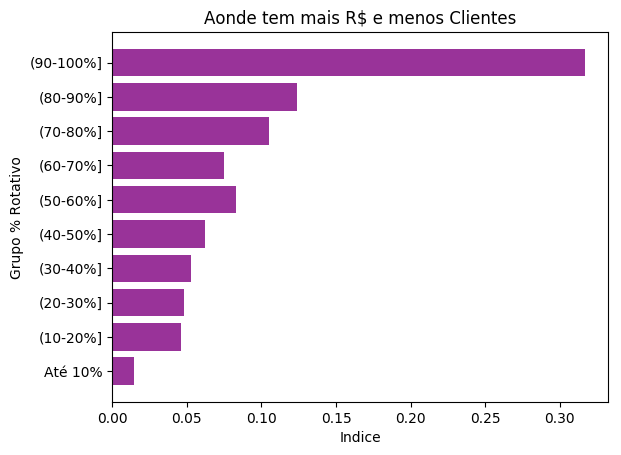

In [618]:
#plt.rcdefaults()

x = np.asarray(divida_consolidada['otimo'])
y = grupos_percent
fig, ax = plt.subplots()
ax.barh( y, x , color='#993399')
ax.set_title ('Aonde tem mais R$ e menos Clientes')
ax.set_xlabel('Indice')
ax.set_ylabel('Grupo % Rotativo')
plt.show()

# Correlação com a fraude 

In [623]:
#importar os dados 
df_ac_train = pd.read_csv("data/acquisition_train.csv")
#selecao das colunas 
df_fraude = df_ac_train[['ids','target_default', 'target_fraud']] 



In [662]:
#Merge  dados de gasto com aquisicao 
df_divida_fraude = df_divida.merge(df_fraude, on=['ids'], how='left')
#df_divida_fraude.head()

### Como é o comportamento em grupo dos fraudadores?

In [663]:
#vamos achar o primrito calote 
#remover as saldo rotativo menor 10% atraso 
df_divida_fraude_atraso_significativo = df_divida_fraude.query('dif_divida_gasto > 0.1')


In [679]:
#Encontrar o primeito mes de calote 
df_divida_fraude_atr_mes = df_divida_fraude_atraso_significativo[['ids','month']].groupby('ids', as_index=False).agg({'month':'min'})
df_divida_fraude_atr_mes = df_divida_fraude_atr_mes.rename(index=str, columns={"month": "1_calote"})
df_divida_fraude_atr_mes.head()

,ids,1_calote
0,0003da40-123b-031a-63b3-f7c9f18516ab,3
1,0004a450-07bd-c652-8473-4e9dedcff8b8,4
2,0005967a-2048-6197-a054-30954efe93b1,1
3,0009b1d5-f5c3-428e-63dd-39b5f04ad7df,0
4,0010b103-a9e4-e08f-ce04-0c65e71a6df9,0


In [698]:
df_calote = df_divida_fraude_atraso_significativo.merge(df_divida_fraude_atr_mes\
                                                        , left_on=['ids','month']\
                                                        , right_on=['ids','1_calote'] \
                                                        ,how='inner')

In [699]:
df_calote.head()

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,cat_credit,dif_divida_limite,dif_divida_gasto,target_default,target_fraud,1_calote
0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00,18000.0,0.189877,0.811095,False,NaN,1
1,a75638f1-4662-4f4f-044a-d649b676d85d,12717,10,7015.36,6836.73,0,17.22,12500.0,0.537606,0.974537,False,NaN,10
2,e643bf65-9288-92f2-df13-eed631fe237c,4997,0,29.37,21.74,1,3.35,5000.0,0.004351,0.740211,False,NaN,0
3,b84024d8-a5ba-6c59-9133-1335c4a0a57d,5913,0,3425.53,3151.48,1,1.84,6000.0,0.532975,0.919998,False,NaN,0
4,8a66ed52-97b1-967f-132c-a5035c130d74,8494,4,8411.42,4610.32,0,3.53,8500.0,0.542774,0.548102,False,NaN,4


In [687]:
df_calote.groupby('target_fraud').agg({'1_calote':'mean', 'dif_divida_gasto':'mean', 'ids':'count'})

,1_calote,dif_divida_gasto,ids
target_fraud,,,
fraud_friends_family,2.187726,0.556804,831
fraud_id,2.378425,0.561865,584


### Permanencia dos fraudadores 

In [703]:
#Encontrar o primeito mes de calote 
df_divida_fraude_ult_mes = df_divida_fraude_atraso_significativo[['ids','month']].groupby('ids', as_index=False).agg({'month':'max'})
df_divida_fraude_ult_mes = df_divida_fraude_ult_mes.rename(index=str, columns={"month": "u_calote"})
df_divida_fraude_ult_mes.head()

,ids,u_calote
0,0003da40-123b-031a-63b3-f7c9f18516ab,17
1,0004a450-07bd-c652-8473-4e9dedcff8b8,18
2,0005967a-2048-6197-a054-30954efe93b1,4
3,0009b1d5-f5c3-428e-63dd-39b5f04ad7df,17
4,0010b103-a9e4-e08f-ce04-0c65e71a6df9,10


In [708]:
df_u_calote = df_calote.merge(df_divida_fraude_ult_mes \
                                                        , left_on=['ids'] \
                                                        , right_on=['ids'] \
                                                        , how='inner')

df_u_calote.groupby('target_fraud').agg({'u_calote':'mean', 'dif_divida_gasto':'mean', 'ids':'count'})

,u_calote,dif_divida_gasto,ids
target_fraud,,,
fraud_friends_family,9.329723,0.556804,831
fraud_id,14.551370,0.561865,584


In [707]:
df_u_calote

,ids,credit_line,month,spends,revolving_balance,card_request,minutes_cs,cat_credit,dif_divida_limite,dif_divida_gasto,target_default,target_fraud,u_calote
0,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,1,4199.99,3406.59,0,0.00,18000.0,0.189877,0.811095,False,NaN,18
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,6,17651.45,8903.46,0,25.62,18000.0,0.496263,0.504404,False,NaN,18
2,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,14,77.68,39.66,0,0.00,18000.0,0.002211,0.510556,False,NaN,18
3,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,15,16911.75,4405.62,0,0.00,18000.0,0.245562,0.260506,False,NaN,18
4,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,17941,18,16902.16,12308.23,0,0.00,18000.0,0.686039,0.728205,False,NaN,18
5,a75638f1-4662-4f4f-044a-d649b676d85d,12717,10,7015.36,6836.73,0,17.22,12500.0,0.537606,0.974537,False,NaN,19
6,a75638f1-4662-4f4f-044a-d649b676d85d,12717,19,10.42,10.36,0,3.35,12500.0,0.000815,0.994242,False,NaN,19
7,e643bf65-9288-92f2-df13-eed631fe237c,4997,0,29.37,21.74,1,3.35,5000.0,0.004351,0.740211,False,NaN,22
8,e643bf65-9288-92f2-df13-eed631fe237c,4997,2,4371.41,4316.68,0,0.00,5000.0,0.863854,0.987480,False,NaN,22
9,e643bf65-9288-92f2-df13-eed631fe237c,4997,3,808.46,754.77,0,0.00,5000.0,0.151045,0.933590,False,NaN,22
